### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Transformar DataFrames em listas de dicionários
dados_loja1 = loja.to_dict(orient='records')
dados_loja2 = loja2.to_dict(orient='records')
dados_loja3 = loja3.to_dict(orient='records')
dados_loja4 = loja4.to_dict(orient='records')


# Define função para somar apenas o Preço
def calcular_faturamento(lista_vendas):
    total = 0
    for venda in lista_vendas:
        total += venda['Preço']
    return round(total, 2)

# Calcula faturamento das lojas
faturamento_loja1 = calcular_faturamento(dados_loja1)
faturamento_loja2 = calcular_faturamento(dados_loja2)
faturamento_loja3 = calcular_faturamento(dados_loja3)
faturamento_loja4 = calcular_faturamento(dados_loja4)

# Faturamento de Cada Loja (sem considerar frete)
print("Faturamento Loja 1:", faturamento_loja1)
print("Faturamento Loja 2:", faturamento_loja2)
print("Faturamento Loja 3:", faturamento_loja3)
print("Faturamento Loja 4:", faturamento_loja4)



Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


In [6]:
# Guarda os faturamentos em dicionário
faturamentos = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

# Calcula maior faturamento
maior_loja = max(faturamentos, key=faturamentos.get)
maior_valor = faturamentos[maior_loja]

# Calcula menor faturamento
menor_loja = min(faturamentos, key=faturamentos.get)
menor_valor = faturamentos[menor_loja]

print(f"A loja com o maior faturamento foi a {maior_loja} e a com o menor faturamento foi a {menor_loja}")


A loja com o maior faturamento foi a Loja 1 e a com o menor faturamento foi a Loja 4


# 2. Vendas por Categoria


In [8]:
# Função para agrupar vendas por categoria em um dicionário
def contar_por_categoria(lista_vendas):
    resultado = {}
    for venda in lista_vendas:
        categoria = venda['Categoria do Produto']
        if categoria in resultado:
            resultado[categoria] += 1
        else:
            resultado[categoria] = 1
    return resultado

# Contagem por loja
categorias_loja1 = contar_por_categoria(dados_loja1)
categorias_loja2 = contar_por_categoria(dados_loja2)
categorias_loja3 = contar_por_categoria(dados_loja3)
categorias_loja4 = contar_por_categoria(dados_loja4)

# Mostrar apenas o top 3
def mostrar_top3(categorias_loja, nome_loja):
    print(f"\nTop 3 categorias mais populares em {nome_loja}:")
    ordenado = sorted(categorias_loja.items(), key=lambda x: x[1], reverse=True)
    top3 = ordenado[:3]
    for categoria, qtd in top3:
        print(f"{categoria}: {qtd} vendas")

# Exibir para todas as lojas
mostrar_top3(categorias_loja1, "Loja 1")
mostrar_top3(categorias_loja2, "Loja 2")
mostrar_top3(categorias_loja3, "Loja 3")
mostrar_top3(categorias_loja4, "Loja 4")




Top 3 categorias mais populares em Loja 1:
moveis: 465 vendas
eletronicos: 448 vendas
brinquedos: 324 vendas

Top 3 categorias mais populares em Loja 2:
moveis: 442 vendas
eletronicos: 422 vendas
brinquedos: 313 vendas

Top 3 categorias mais populares em Loja 3:
moveis: 499 vendas
eletronicos: 451 vendas
brinquedos: 315 vendas

Top 3 categorias mais populares em Loja 4:
moveis: 480 vendas
eletronicos: 451 vendas
brinquedos: 338 vendas


# 3. Média de Avaliação das Lojas

In [9]:
#Função para somar as avaliações por loja e tirar a media
def calcular_media_avaliacao(lista_vendas):
    soma = 0
    qtd = 0
    for venda in lista_vendas:
        nota = venda['Avaliação da compra']
        soma += nota
        qtd += 1
    if qtd == 0:
        return 0
    return round(soma / qtd, 2)

# Calcula para cada loja
media_avaliacao_loja1 = calcular_media_avaliacao(dados_loja1)
media_avaliacao_loja2 = calcular_media_avaliacao(dados_loja2)
media_avaliacao_loja3 = calcular_media_avaliacao(dados_loja3)
media_avaliacao_loja4 = calcular_media_avaliacao(dados_loja4)

# Exibe resultados
print("Média de avaliação Loja 1:", media_avaliacao_loja1)
print("Média de avaliação Loja 2:", media_avaliacao_loja2)
print("Média de avaliação Loja 3:", media_avaliacao_loja3)
print("Média de avaliação Loja 4:", media_avaliacao_loja4)


Média de avaliação Loja 1: 3.98
Média de avaliação Loja 2: 4.04
Média de avaliação Loja 3: 4.05
Média de avaliação Loja 4: 4.0


In [10]:
# Para saber qual loja teve a melhor e a pior media
# Função para guardar médias em dicionário
medias_avaliacao = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

# Encontrar maior e menor
melhor_loja = max(medias_avaliacao, key=medias_avaliacao.get)
melhor_nota = medias_avaliacao[melhor_loja]

pior_loja = min(medias_avaliacao, key=medias_avaliacao.get)
pior_nota = medias_avaliacao[pior_loja]

# Exibir resultado
print(f"A loja com o melhor avaliação foi a {melhor_loja}, com nota {melhor_nota} e a com a pior avaliação foi a {pior_loja}, com nota {pior_nota}")


A loja com o melhor avaliação foi a Loja 3, com nota 4.05 e a com a pior avaliação foi a Loja 1, com nota 3.98


# 4. Produtos Mais e Menos Vendidos

In [13]:
# Função para contar vendas por produto
def contar_por_produto(lista_vendas):
    contagem = {}
    for venda in lista_vendas:
        produto = venda['Produto']
        if produto in contagem:
            contagem[produto] += 1
        else:
            contagem[produto] = 1
    return contagem

#Chama a função para cada loja
contagem_loja1 = contar_por_produto(dados_loja1)
contagem_loja2 = contar_por_produto(dados_loja2)
contagem_loja3 = contar_por_produto(dados_loja3)
contagem_loja4 = contar_por_produto(dados_loja4)

# Função para identificar mais e menos vendidos
def identificar_extremos(contagem):
    mais_vendido = max(contagem, key=contagem.get)
    menos_vendido = min(contagem, key=contagem.get)
    return (mais_vendido, contagem[mais_vendido]), (menos_vendido, contagem[menos_vendido])

# Função exibir resultados
def exibir_extremos_loja(nome_loja, contagem):
    mais, menos = identificar_extremos(contagem)
    print(f"\nResumo de vendas da {nome_loja}:")
    print(f"Produto mais vendido: {mais[0]} ({mais[1]} vendas)")
    print(f"Produto menos vendido: {menos[0]} ({menos[1]} vendas)")

# Chama função para todas as lojas
exibir_extremos_loja("Loja 1", contagem_loja1)
exibir_extremos_loja("Loja 2", contagem_loja2)
exibir_extremos_loja("Loja 3", contagem_loja3)
exibir_extremos_loja("Loja 4", contagem_loja4)



Resumo de vendas da Loja 1:
Produto mais vendido: Micro-ondas (60 vendas)
Produto menos vendido: Headset (33 vendas)

Resumo de vendas da Loja 2:
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Resumo de vendas da Loja 3:
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Resumo de vendas da Loja 4:
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [14]:
# Função para somar e tirar a media de frete de cada loja
def calcular_media_frete(lista_vendas):
    soma_frete = 0
    qtd_vendas = 0
    for venda in lista_vendas:
        frete = venda['Frete']
        soma_frete += frete
        qtd_vendas += 1
    if qtd_vendas == 0:
        return 0
    return round(soma_frete / qtd_vendas, 2)

# Função para cada loja
media_frete_loja1 = calcular_media_frete(dados_loja1)
media_frete_loja2 = calcular_media_frete(dados_loja2)
media_frete_loja3 = calcular_media_frete(dados_loja3)
media_frete_loja4 = calcular_media_frete(dados_loja4)

# Exibir resultados
print("Média de frete Loja 1: R$", media_frete_loja1)
print("Média de frete Loja 2: R$", media_frete_loja2)
print("Média de frete Loja 3: R$", media_frete_loja3)
print("Média de frete Loja 4: R$", media_frete_loja4)


Média de frete Loja 1: R$ 34.69
Média de frete Loja 2: R$ 33.62
Média de frete Loja 3: R$ 33.07
Média de frete Loja 4: R$ 31.28


In [15]:
# Guardar todas as médias em um dicionário
medias_frete = {
    'Loja 1': media_frete_loja1,
    'Loja 2': media_frete_loja2,
    'Loja 3': media_frete_loja3,
    'Loja 4': media_frete_loja4
}

# Encontrar maior e menor
maior_loja_frete = max(medias_frete, key=medias_frete.get)
maior_media = medias_frete[maior_loja_frete]

menor_loja_frete = min(medias_frete, key=medias_frete.get)
menor_media = medias_frete[menor_loja_frete]

# Exibir resultado
# Exibir resultado
print(f"A loja com a menor media de frete é a {menor_loja_frete}, com valor de {menor_media} e a com a maior média foi a {maior_loja_frete}, com valor {maior_media}")

A loja com a menor media de frete é a Loja 4, com valor de 31.28 e a com a maior média foi a Loja 1, com valor 34.69


# 6. Gráficos

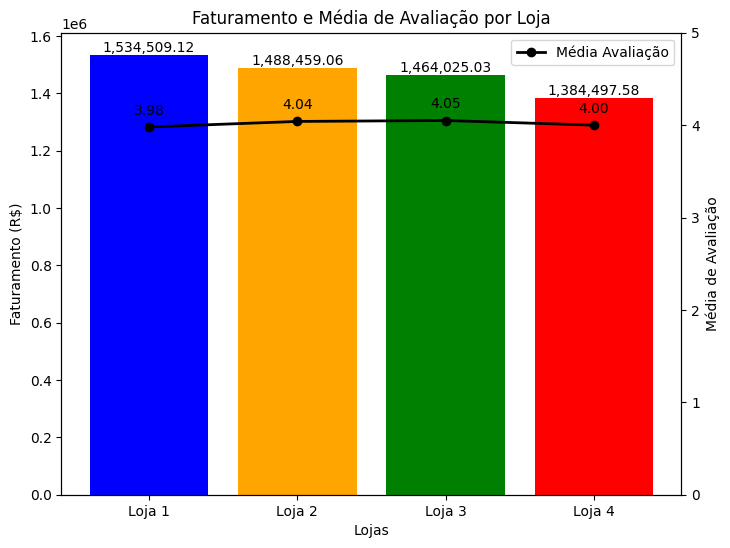

In [25]:
# Grafico compartivo de faturamento em paralelo com média de avaliação dos clientes
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

fig, ax1 = plt.subplots(figsize=(8,6))

# Gráfico de barras para faturamento
bars = ax1.bar(lojas, faturamentos, color=['blue', 'orange', 'green', 'red'])
ax1.set_xlabel('Lojas')
ax1.set_ylabel('Faturamento (R$)')
ax1.set_title('Faturamento e Média de Avaliação por Loja')

# Texto em cima das barras
for bar in bars:
    altura = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, altura, f'{altura:,.2f}', ha='center', va='bottom')


# Criar um segundo eixo y para média de avaliação
ax2 = ax1.twinx()
ax2.plot(lojas, avaliacoes, color='black', marker='o', linewidth=2, label='Média Avaliação')
ax2.set_ylabel('Média de Avaliação')
ax2.set_ylim(0, 5)  # notas vão até 5

# Adicionar os valores das avaliações como texto no gráfico
for i, nota in enumerate(avaliacoes):
    ax2.text(i, nota + 0.1, f'{nota:.2f}', ha='center', va='bottom', color='black')

# Legenda para a linha
ax2.legend(loc='upper right', fontsize=10)

plt.show()



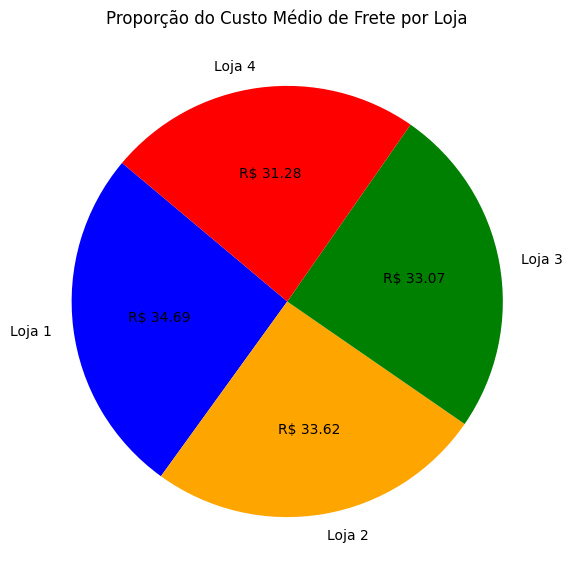

In [29]:
#Gráfico de comparação de média de fretes
import matplotlib.pyplot as plt

labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias_frete = [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]

def func_valor_real(pct, allvals):
    absolute = pct/100 * sum(allvals)
    return f'R$ {absolute:.2f}'

plt.figure(figsize=(7,7))
plt.pie(
    medias_frete,
    labels=labels,
    autopct=lambda pct: func_valor_real(pct, medias_frete),
    startangle=140,
    colors=['blue', 'orange', 'green', 'red']
)
plt.title('Proporção do Custo Médio de Frete por Loja')
plt.show()



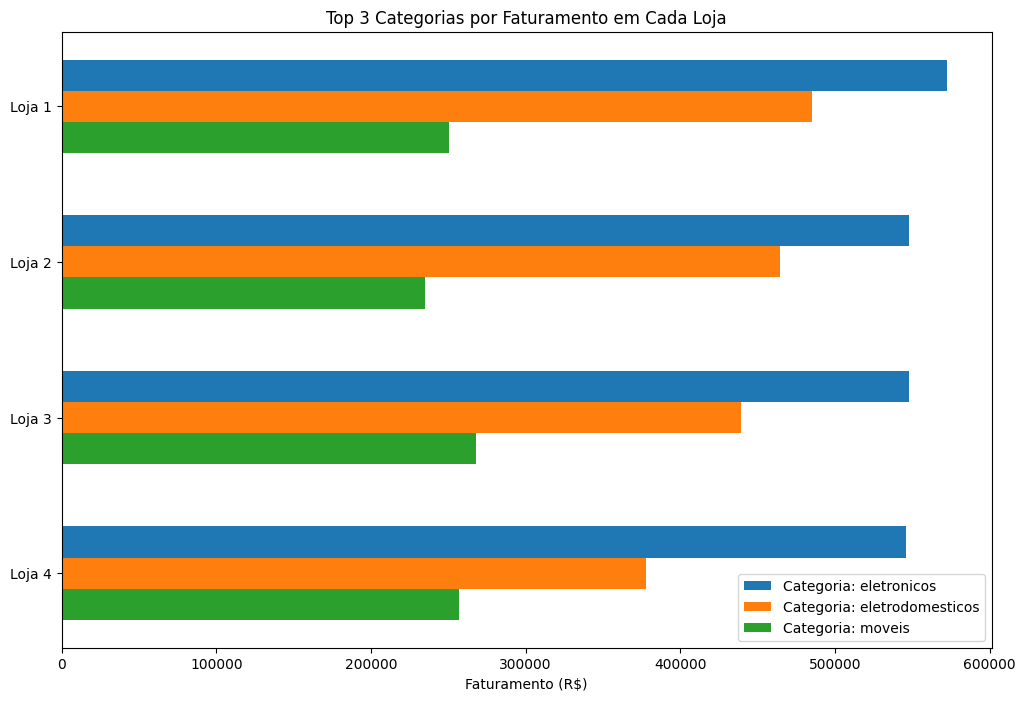

In [35]:
#Grafico comparativo de faturamento das categorais mais vendidas entre lojas
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

def faturamento_por_categoria(dados_loja):
    faturamento_cat = {}
    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        faturamento_cat[categoria] = faturamento_cat.get(categoria, 0) + preco
    return faturamento_cat

# Calcular faturamento por categoria para cada loja e pegar top 3
top3_categorias = []
faturamentos_top3 = []

for dados_loja in [dados_loja1, dados_loja2, dados_loja3, dados_loja4]:
    faturamento_cat = faturamento_por_categoria(dados_loja)
    top3 = sorted(faturamento_cat.items(), key=lambda x: x[1], reverse=True)[:3]
    categorias, faturamentos = zip(*top3)
    top3_categorias.append(categorias)
    faturamentos_top3.append(faturamentos)

# Preparar posições para as barras (4 lojas x 3 categorias)
indices = np.arange(len(lojas))
altura_barra = 0.2

plt.figure(figsize=(12, 8))

for i in range(3):  # 3 categorias
    valores = [faturamentos_top3[j][i] for j in range(4)]
    posicoes = indices + i * altura_barra
    plt.barh(posicoes, valores, height=altura_barra, label=f'Categoria: {top3_categorias[0][i]}')

plt.yticks(indices + altura_barra, lojas)
plt.xlabel('Faturamento (R$)')
plt.title('Top 3 Categorias por Faturamento em Cada Loja')
plt.legend()
plt.gca().invert_yaxis()  # Inverter para a loja 1 ficar no topo

plt.show()
